# Number of Orders Prediction

Bir ürün için sipariş sayısını tahmin etmek, bir işletmenin ürününü pazarlamak için ne kadar yatırım yapması gerektiğini belirlemede izleyebileceği stratejilerden biridir. Bu nedenle, sipariş sayısını tahmin etmek, ürün tabanlı şirketler için önemli bir veri bilimi kullanım örneğidir.<br>
Biz de bu projemizde sipariş sayısını tahmin eden bir model oluşturacağız.

<img src="https://www.shipbob.com/wp-content/uploads/2019/01/iStock-692898468-2-optimized.webp">

<a href="https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv">Datay Buradan Erişebilirsiniz</a>

* Ürün Kimliği
* Mağaza Kimliği
* Takviyenin satıldığı mağaza türü
* Siparişin alındığı lokasyon türü
* Satış Tarihi
* Bölge kodu
* Sipariş anında resmi tatil olup olmadığı
* Ürünün indirimde olup olmadığı
* Verilen sipariş sayısı
* Satış

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")

### EDA

In [3]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [4]:
df.shape

(188340, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df. isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [7]:
df["ID"].nunique()

188340

In [8]:
df["Store_id"].nunique()

365

In [9]:
df["Store_Type"].nunique()

4

In [10]:
df["Store_Type"].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [11]:
df["Location_Type"].nunique()

5

In [12]:
df["Location_Type"].unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [13]:
df["Region_Code"].nunique()

4

In [14]:
df["Region_Code"].unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

In [15]:
df["Discount"].unique()

array(['Yes', 'No'], dtype=object)

### Faeture Engineering

In [16]:
d1={'S1':1, 'S4':4, 'S3':3, 'S2':2}

In [17]:
df["Store_Type"]=df["Store_Type"].map(d1)

In [18]:
d2={'L3':3, 'L2':2, 'L1':1, 'L5':5, 'L4':4}

In [19]:
df["Location_Type"]=df["Location_Type"].map(d2)

In [20]:
d3={'R1':1, 'R4':4, 'R2':2, 'R3':3}

In [21]:
df["Region_Code"]=df["Region_Code"].map(d3)

In [22]:
d4={'Yes':1, 'No':0}

In [23]:
df["Discount"]=df["Discount"].map(d4)

In [24]:
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df['month'] = df["Date"].dt.month

In [25]:
df=df.drop(["ID","Date"],axis=1)

<Axes: >

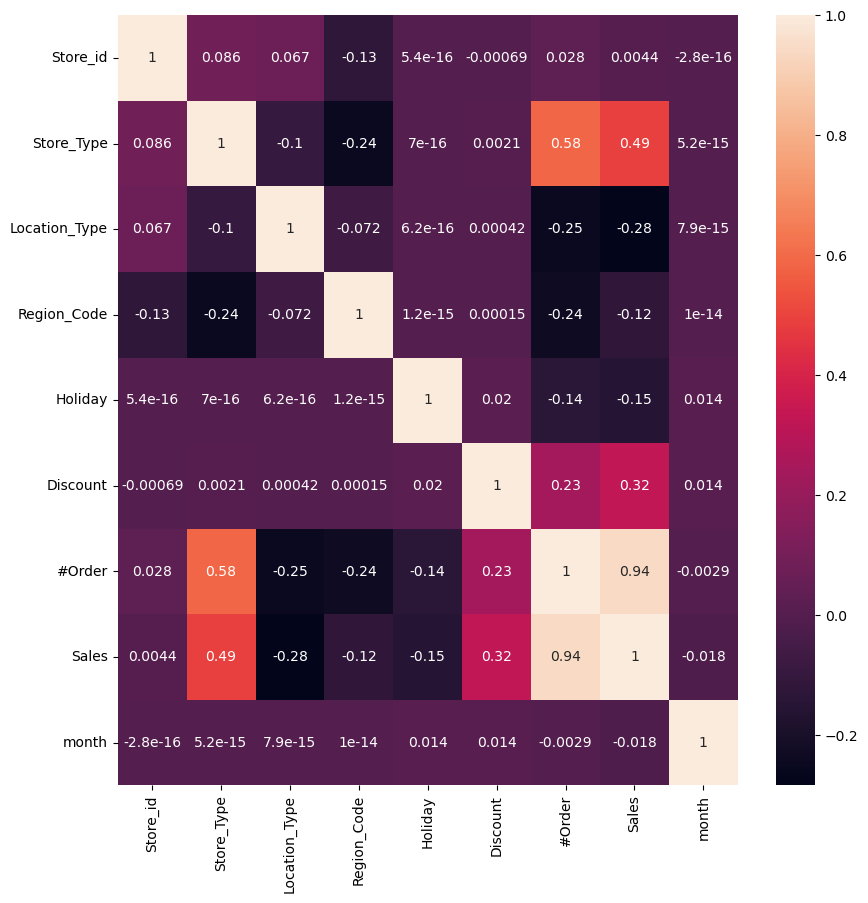

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Modelling

In [27]:
x=df.drop(["#Order","Store_id","month"],axis=1)
y=df["#Order"]
# Deep Learning için de yedeğini alıyorum
xd=df.drop(["#Order","Store_id","month"],axis=1)
yd=df["#Order"]

In [28]:
x

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,3,1,1,1,7011.84
1,4,2,1,1,1,51789.12
2,3,2,1,1,1,36868.20
3,2,3,1,1,1,19715.16
4,2,3,4,1,1,45614.52
...,...,...,...,...,...,...
188335,2,3,2,1,1,37272.00
188336,4,2,1,1,0,54572.64
188337,1,3,2,1,0,31624.56
188338,3,1,2,1,1,49162.41


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [30]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,9.425756e-01,7.305325e+00,5.178954e+00
Gradient Boosting,9.400838e-01,7.462141e+00,5.371463e+00
Linear,9.155698e-01,8.858097e+00,6.583139e+00
Ridge,9.155698e-01,8.858097e+00,6.583137e+00
Lasso,9.112164e-01,9.083594e+00,6.693326e+00
ElasticNet,9.098880e-01,9.151296e+00,6.712386e+00
KNeighborsRegressor,9.012810e-01,9.578375e+00,7.273156e+00
Extra Tree,8.951260e-01,9.872461e+00,6.891845e+00
Decision Tree,8.940280e-01,9.924004e+00,6.964948e+00
AdaBoost,8.897512e-01,1.012228e+01,7.227774e+00


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
tahmin=lr.predict(x_test)

In [36]:
r2_score(y_test,tahmin)

0.9155697601430834

In [37]:
mean_squared_error(y_test,tahmin)**.5

8.858096766388448

#### Feature Importance

In [38]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_[0]})

In [39]:
feature_importance=feature_importance.sort_values(by="Coefs",ascending=False)

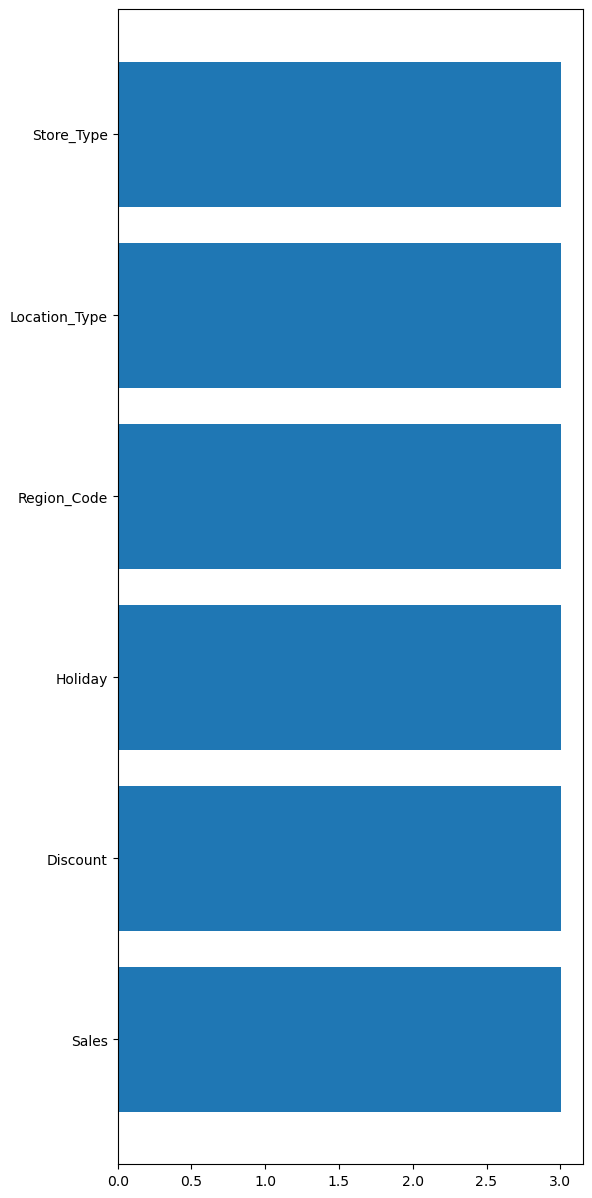

In [40]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis() 

#### Residuals 

In [41]:
residuals=y_test-tahmin

<Axes: xlabel='#Order', ylabel='Count'>

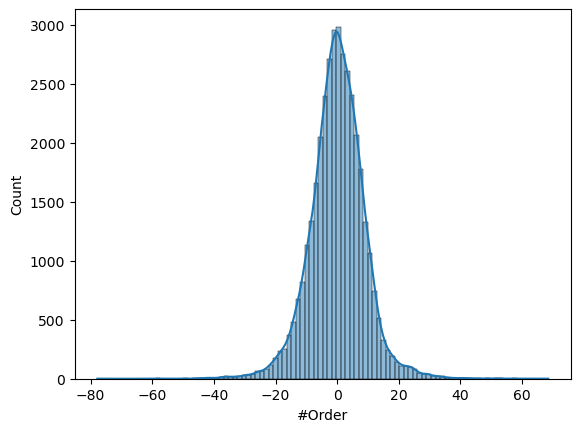

In [42]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='#Order', ylabel='Density'>

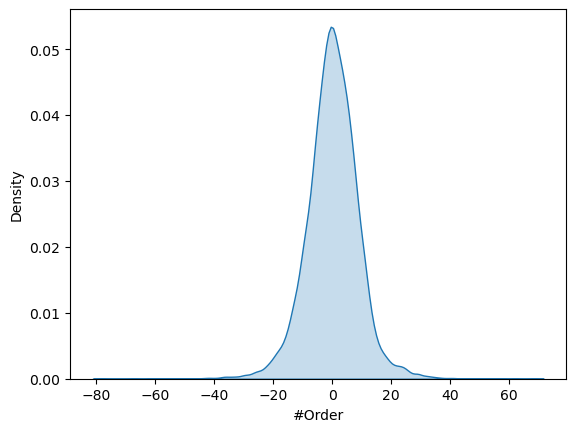

In [43]:
sns.kdeplot(residuals, fill=True)

In [44]:
model=lr.fit(x,y)

In [45]:
import pickle

In [46]:
pickle.dump(model,open("siparis.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
from sklearn.preprocessing import normalize, scale

In [49]:
xd=scale(xd)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(xd,yd,test_size=.20 ,random_state=42)

In [51]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                                                           

In [52]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - loss: 1169.3235 - val_loss: 61.6122
Epoch 2/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 56.6905 - val_loss: 58.3475
Epoch 3/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 55.9592 - val_loss: 57.4495
Epoch 4/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 54.8087 - val_loss: 56.1358
Epoch 5/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 53.2844 - val_loss: 55.3367
Epoch 6/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 52.5484 - val_loss: 60.8424
Epoch 7/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 53.2866 - val_loss: 53.7685
Epoch 8/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 52.3350 - val_loss: 55.6661
Epoch 9/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 53.2754 - val_loss: 53.4605
Epoch 10/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 52.3502 - val_loss: 53.7212
Epoch 11/500
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 5

In [53]:
tahmin=model.predict(x_test)

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step


In [54]:
mean_squared_error(tahmin,y_test)**.5

7.207820721805307

In [55]:
r2_score(tahmin,y_test)

0.9409273409387761

In [56]:
loss_f=pd.DataFrame(history.history)

<Axes: >

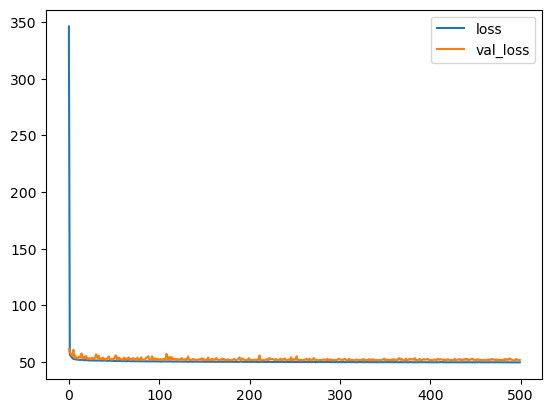

In [57]:
loss_f.plot()

Sonuc olarak XGBRegressor den 93% r2 score aldık ve bir streamlit uygulaması yaptık. Ayrıca deep learning ile de çözüp 94% r2 score aldık